In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/Hack Univ/Training Data.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Hack Univ/Test Data.csv")
original_df_test=df_test.copy()
 

In [ ]:
df_train.sample(5)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
56370,56371,6351922,57,6,married,rented,yes,Dentist,Khammam,Telangana,5,10,0
142573,142574,2240686,42,1,single,rented,no,Computer_hardware_engineer,Dharmavaram,Andhra_Pradesh,1,13,0
164383,164384,3307171,68,2,single,rented,yes,Comedian,"Khora,_Ghaziabad",Uttar_Pradesh,2,14,0
141755,141756,2087379,33,17,married,rented,yes,Computer_hardware_engineer,Bokaro,Jharkhand,4,10,0
10060,10061,7806795,68,20,single,rented,yes,Technology_specialist,Satna,Madhya_Pradesh,9,10,0


In [ ]:
df_train.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [ ]:
original_df_test.columns

Index(['id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years'],
      dtype='object')

In [ ]:
 df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df_train['experience'].unique()

array([ 3, 10,  4,  2, 11,  0, 14, 17, 12,  7,  9,  6,  8,  1, 13, 19, 15,
       20,  5, 16, 18])

In [ ]:
df_train['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [ ]:
 
ax_4 = sns.countplot(x= 'profession', hue= 'risk_flag', data= df_train)
ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=90, fontweight='light',
    fontsize='x-small')

In [ ]:
df_train['city'].value_counts() 

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: city, Length: 317, dtype: int64

In [ ]:
df_train['state'].value_counts() 


Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64

In [ ]:
df_train['state'].value_counts() 
 
ax_4 = sns.countplot(x= 'state', hue= 'risk_flag', data= df_train)
ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=90, fontweight='light',fontsize='x-small')

In [ ]:
df_train['current_job_years'].describe()

count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: current_job_years, dtype: float64

In [ ]:
df_train['current_house_years'].describe()

count    252000.000000
mean         11.997794
std           1.399037
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: current_house_years, dtype: float64

In [ ]:
def cleaner(x):
  a= "".join(x.replace('_', ' ').split())

  return a
        
df_train['city']=df_train['city'].apply(cleaner)
df_train['state']=df_train['state'].apply(cleaner)
df_train['profession']=df_train['profession'].apply(cleaner)

df_test['city']=df_test['city'].apply(cleaner)
df_test['state']=df_test['state'].apply(cleaner)
df_test['profession']=df_test['profession'].apply(cleaner)

In [ ]:
check_city =df_train.city.value_counts().to_dict()
check1_city =df_test.city.value_counts().to_dict()
check_state =df_train.state.value_counts().to_dict()
check1_state =df_test.state.value_counts().to_dict()
check_profession =df_train.profession.value_counts().to_dict()
check1_profession =df_test.profession.value_counts().to_dict()

In [ ]:
df_train['city']=df_train['city'].map(check_city)
df_test['city']=df_test['city'].map(check1_city)
df_train['state']=df_train['state'].map(check_state)
df_test['state']=df_test['state'].map(check1_state)
df_train['profession']=df_train['profession'].map(check_profession)
df_test['profession']=df_test['profession'].map(check1_profession)

In [ ]:
df_train["profession"]=pd.factorize(df_train.profession)[0]
df_train["city"]=pd.factorize(df_train.city)[0]
df_train["state"]=pd.factorize(df_train.state)[0]
df_train["married"]=pd.factorize(df_train.married)[0]
df_train["house_ownership"]=pd.factorize(df_train.house_ownership)[0]
df_train["car_ownership"]=pd.factorize(df_train.car_ownership)[0]
df_train.sample(5)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
133674,133675,8316469,40,11,0,0,0,48,1,20,5,10,0
229281,229282,53134,69,16,0,0,0,31,151,14,3,14,0
145831,145832,7433875,32,12,0,0,1,30,28,4,11,10,0
186072,186073,6563391,42,9,1,0,0,0,165,11,9,12,0
181344,181345,2854714,46,20,0,0,0,41,85,8,7,10,0


In [ ]:
df_test["profession"]=pd.factorize(df_test.profession)[0]
df_test["city"]=pd.factorize(df_test.city)[0]
df_test["state"]=pd.factorize(df_test.state)[0]
df_test["married"]=pd.factorize(df_test.married)[0]
df_test["house_ownership"]=pd.factorize(df_test.house_ownership)[0]
df_test["car_ownership"]=pd.factorize(df_test.car_ownership)[0]
df_test.sample(5)

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
137,138,5830306,68,16,1,0,0,3,35,6,7,10
21359,21360,6530277,32,5,0,0,0,19,39,6,5,13
23315,23316,6618166,27,1,0,0,1,39,2,6,1,13
23796,23797,7535330,27,17,0,0,1,21,27,1,5,10
27158,27159,9775375,62,9,0,0,0,29,50,17,3,12


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
df_drop_train = df_train.drop( labels='Id',axis = 1 )
col_names_train = list(df_drop_train.columns)
df_mm_train = mm_scaler.fit_transform( df_drop_train )
df_mm_train = pd.DataFrame(df_mm_train, columns=col_names_train)
df_drop_test = df_test.drop( labels='id',axis = 1 )
col_names_test = list(df_drop_test.columns)
df_mm_test = mm_scaler.fit_transform( df_drop_test )
df_mm_test = pd.DataFrame(df_mm_test, columns=col_names_test)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_mm_train, test_size=0.2,shuffle=True,random_state=56)
test.head(5)

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
69963,0.241322,0.465517,0.65,0.0,0.0,0.0,0.30,0.376033,0.333333,0.357143,0.00,0.0
217403,0.255097,0.051724,0.00,0.0,0.0,0.0,0.74,0.305785,0.370370,0.000000,0.75,0.0
231159,0.167209,0.327586,0.90,0.0,0.0,1.0,0.40,0.946281,0.185185,1.000000,0.50,1.0
47188,0.319243,0.862069,0.70,0.0,0.0,0.0,0.12,0.776860,0.222222,0.214286,0.75,0.0
77818,0.057384,0.103448,0.15,0.0,0.0,0.0,0.76,0.619835,0.851852,0.214286,0.00,0.0


In [ ]:
 
a=train.drop(labels='risk_flag',axis=1)
xtrain=a[['income','profession' ]]
ytrain=train['risk_flag']

b =test.drop(labels='risk_flag',axis=1)
xtest=b[['income','profession' ]]
ytest=test['risk_flag']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(13, 100)}
     
    dtree_model=DecisionTreeClassifier()
     
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
     
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [ ]:
dtree_grid_search(X=xtrain,y=ytrain,nfolds=5)

In [ ]:
def calc_score(model,xtrain,ytrain,xtest,ytest):
  model.fit(xtrain,ytrain)
  predict = model.predict(xtrain)
  scr1 = score( ytrain,predict )
  predict1 = model.predict(xtest)
  scr2 = score( ytest,predict1 )
  return scr1,scr2

In [ ]:
def effect(train_score,test_score,x_axis,title):
  plt.style.use("fivethirtyeight")
  plt.style.use("dark_background")
  plt.figure(figsize=(5,5),dpi=129)
  plt.plot(x_axis,train_score,color='orange',label='train_score')
  plt.plot(x_axis,test_score,color='cyan',label='test_score')
  plt.title(title)
  plt.legend()
  plt.xlabel("parameter_value")
  plt.ylabel("roc-auc score")
  plt.show()

In [ ]:
max_depth = [i for i in range(1,50)]
train=[]
test=[]
for i in max_depth:
  model= RandomForestClassifier(class_weight='balanced',max_depth=i,random_state=42)
  scr1,scr2=calc_score(model,xtrain,ytrain,xtest,ytest)
  train.append(scr1)
  test.append(scr2)

In [ ]:
effect(train,test,range(1,50),"max_depth")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as score
rfc= RandomForestClassifier(class_weight='balanced',max_depth=12,min_samples_split=437,max_leaf_nodes=300,min_samples_leaf=115,n_estimators=12)
rfc.fit(xtrain, ytrain)
print("RandomForestClassifier")
print(score(ytrain,rfc.predict(xtrain)))
print(score(ytest,rfc.predict(xtest) ))

RandomForestClassifier
0.6790386436257114
0.6729658463118344


In [ ]:
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
print('ROC AUC:',  cross_val_score(rfc, xtrain, ytrain, cv=StratifiedKFold(n_splits=5), scoring='roc_auc').mean())

ROC AUC: 0.7370712687471761


In [ ]:
cv1=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
from xgboost import XGBRFClassifier
model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
n_scores = cross_val_score(model, xtest, ytest, scoring='roc_auc', cv=cv1, n_jobs=-1)

In [ ]:
#print(n_scores)

[0.53938965 0.51893336 0.5291264  0.54451156 0.5094901  0.54407263
 0.54757161 0.54853564 0.5483181  0.54463451 0.54197174 0.51604145
 0.5386368  0.56709118 0.52449231 0.54442446 0.55701359 0.54758185
 0.54273554 0.53852501 0.52833135 0.55552354 0.55583787 0.55030306
 0.53721866 0.54308737 0.56467058 0.5320119  0.52181246 0.55065874]


In [ ]:
from sklearn.metrics import roc_auc_score as score
clf = DecisionTreeClassifier(  class_weight='balanced',max_depth=14,min_samples_split=210,max_leaf_nodes=810,min_samples_leaf=70)
clf.fit(xtrain, ytrain)
print("DecisionTreeClassifier")
feature_imp=pd.Series(clf.feature_importances_,index=xtrain.columns)
k=feature_imp.sort_values()
print(score(ytrain,clf.predict(xtrain)))
print(score(ytest,clf.predict(xtest) ))
 

DecisionTreeClassifier
0.6078072724703142
0.5996121768577671


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xtrain, ytrain)
print("KNeighborsClassifier")
print(score(ytrain,neigh.predict(xtrain)))
print(score(ytest,neigh.predict(xtest) ))

KNeighborsClassifier
0.7546689499098579
0.7217402532826275


Text(0.5, 1.0, 'feature importance')

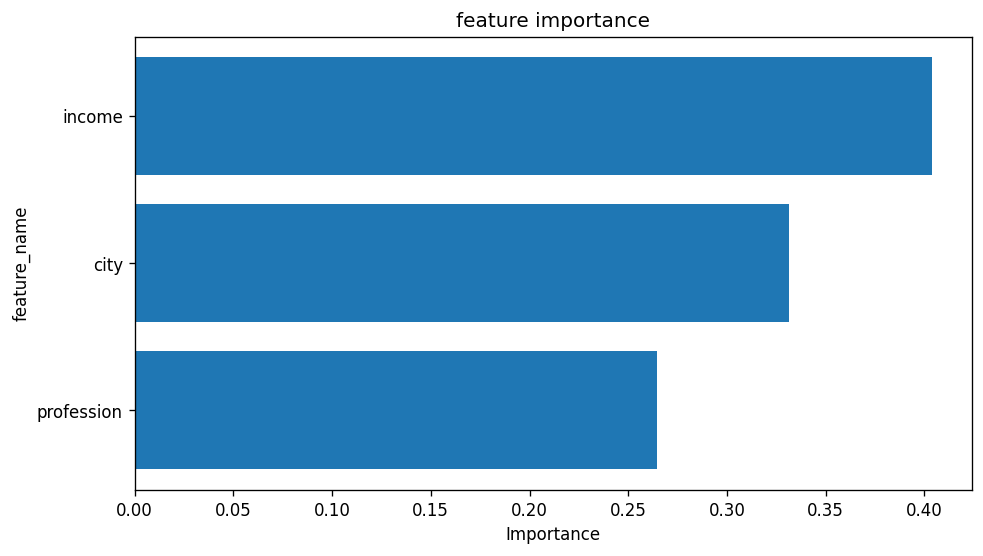

In [ ]:
plt.figure(figsize=(9,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel('Importance')
plt.ylabel('feature_name')
plt.title('feature importance')

In [ ]:
id_col=original_df_test.id
submission=pd.DataFrame({'id':id_col,'risk_flag':rfc.predict( df_mm_test[['income','profession' ]]   ) })
submission.to_csv('/content/drive/MyDrive/Hack Univ/subalyal.csv',index=False)

In [ ]:
done_test=pd.read_csv('/content/drive/MyDrive/Hack Univ/subalyal.csv')
done_test=done_test.astype('int32')
done_test

,id,risk_flag
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
27995,27996,0
27996,27997,0
27997,27998,1
27998,27999,1


In [ ]:
done_test.to_csv('/content/drive/MyDrive/Hack Univ/subalyal.csv',index=False)